<a href="https://colab.research.google.com/github/ashutoshsinha25/Coursera_Projects/blob/main/Tweet%20Emotion%20Recognition%20with%20TensorFlow/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Emotion Recognition using NLP and Tensorflow

Dataset : [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)


## Setup and Imports

 - Installing Hugging Face's nlp package
 - Importing libraires

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 212 kB 50.7 MB/s 


In [2]:
# import libraries
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp 
import random

In [49]:
# helper functions

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

In [4]:
# tf version
tf.__version__

'2.8.0'

## Importing data 
  - Import the tweet emotion dataset
  - Create training, valildation and testing sets
  - Extract tweets and labels from the examples


In [5]:
dataset = nlp.load_dataset("emotion")

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [6]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [7]:
type(dataset)

nlp.dataset_dict.DatasetDict

In [8]:
# defining datasets
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [9]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [10]:
tweets,labels = get_tweet(train)

In [11]:
tweets[0] , labels[0]

('i didnt feel humiliated', 'sadness')

In [14]:
random.seed(42)
i = 0
while(i!=5):
  n = random.randint(0,len(tweets))
  print("Tweets: " , tweets[n])
  print("Labels: ", labels[n])
  print("-------------------------------------------")
  i+=1


Tweets:  i do find new friends i m going to try extra hard to make them stay and if i decide that i don t want to feel hurt again and just ride out the last year of school on my own i m going to have to try extra hard not to care what people think of me being a loner
Labels:  sadness
-------------------------------------------
Tweets:  i asked them to join me in creating a world where all year old girls could grow up feeling hopeful and powerful
Labels:  joy
-------------------------------------------
Tweets:  i feel when you are a caring person you attract other caring people into your life
Labels:  love
-------------------------------------------
Tweets:  i sometimes feel so vulnerable and so lost
Labels:  fear
-------------------------------------------
Tweets:  i think you would all agree that feeling your toes and fingers go numb is perhaps one of the most unpleasant feelings ever
Labels:  sadness
-------------------------------------------


## Tokenizer

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)


In [18]:
tweets[0]

'i didnt feel humiliated'

In [19]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Padding an Trucating Sequences
- chceking length of the tweets 
- creating padded sequences

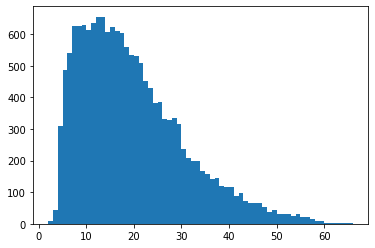

In [20]:
lengths=[len(t.split(" ")) for t in tweets]
plt.hist(lengths , bins = len(set(lengths)))
plt.show()

In [21]:
maxlen = 50


from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
def get_sequences(tokenizer , tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post' , padding = 'post', maxlen = maxlen) 
  return padded


In [23]:
padded_train_seq = get_sequences(tokenizer , tweets)

In [24]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Praparing the labels 
  - creating classes to index and index to classes dictionries
  - converting text labels to numeric labels

In [25]:
classes = set(labels)
print(classes)

{'anger', 'love', 'sadness', 'surprise', 'fear', 'joy'}


(array([4666.,    0., 2159.,    0., 1304.,    0.,  572.,    0., 1937.,
           0., 5362.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <a list of 11 Patch objects>)

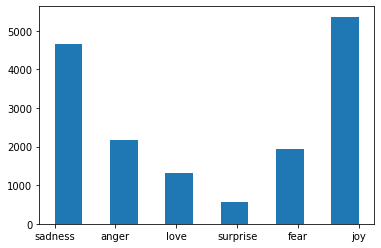

In [26]:
plt.hist(labels ,bins = 11)
# class imbalance problem

In [27]:
class_to_index = dict((c , i) for i,c in enumerate(classes))
index_to_class = dict((v , k) for k,v in class_to_index.items())

In [28]:
class_to_index

{'anger': 0, 'fear': 4, 'joy': 5, 'love': 1, 'sadness': 2, 'surprise': 3}

In [29]:
index_to_class

{0: 'anger', 1: 'love', 2: 'sadness', 3: 'surprise', 4: 'fear', 5: 'joy'}

In [31]:
names_to_ids = lambda labels : np.array([class_to_index.get(x) for x in labels])

In [32]:
train_labels = names_to_ids(labels)
print(train_labels[0])

2


In [34]:
train_labels[0]

2

## Creating the model

In [66]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    tf.keras.layers.Dense(6, activation = 'softmax')
])


model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy']) 




model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [38]:
val_tweets ,val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [40]:
val_tweets[0] , val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 2)

In [42]:
# fittinh the model 
history = model.fit(padded_train_seq,
                    train_labels,
                    validation_data = (val_seq,val_labels),
                    epochs=20,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)])

Epoch 1/20
500/500 [==============================] - 39s 60ms/step - loss: 1.3482 - accuracy: 0.4784 - val_loss: 1.0411 - val_accuracy: 0.6245
Epoch 2/20
500/500 [==============================] - 28s 56ms/step - loss: 0.7052 - accuracy: 0.7479 - val_loss: 0.6136 - val_accuracy: 0.7970
Epoch 3/20
500/500 [==============================] - 28s 55ms/step - loss: 0.3818 - accuracy: 0.8694 - val_loss: 0.4537 - val_accuracy: 0.8465
Epoch 4/20
500/500 [==============================] - 28s 56ms/step - loss: 0.2195 - accuracy: 0.9286 - val_loss: 0.3846 - val_accuracy: 0.8730
Epoch 5/20
500/500 [==============================] - 28s 55ms/step - loss: 0.1446 - accuracy: 0.9537 - val_loss: 0.3746 - val_accuracy: 0.8805
Epoch 6/20
500/500 [==============================] - 26s 53ms/step - loss: 0.1008 - accuracy: 0.9692 - val_loss: 0.3799 - val_accuracy: 0.8900
Epoch 7/20
500/500 [==============================] - 27s 53ms/step - loss: 0.0992 - accuracy: 0.9680 - val_loss: 0.3647 - val_accuracy:

In [44]:
print()

## Evaluating the model 

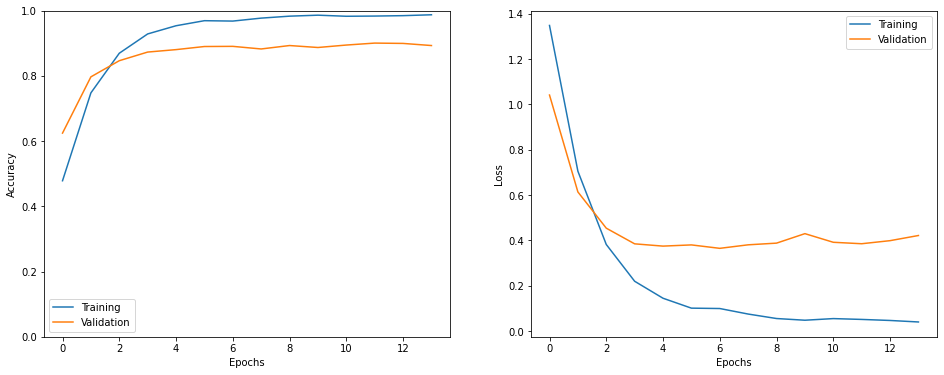

In [50]:
show_history(history)

In [51]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer , test_tweets)
test_labels = names_to_ids(test_labels)

In [52]:
model.evaluate(test_seq , test_labels)

63/63 [==============================] - 1s 20ms/step - loss: 0.4510 - accuracy: 0.8885


[0.45103785395622253, 0.8884999752044678]

In [64]:
i = random.randint(0 ,len(test_labels)-1)
print("Sentence: ", test_tweets[i])
print("Emotion: ", index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print("Predicted Emotion: ", pred_class)


Sentence:  im not feeling mellow
Emotion:  joy
Predicted Emotion:  joy


In [60]:
pred = model.predict(test_seq)
classes_x=np.argmax(pred,axis=1)

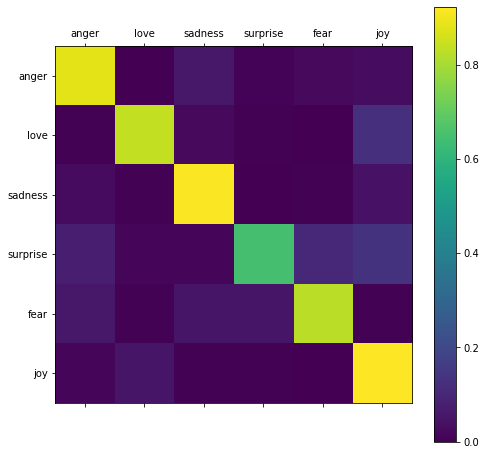

In [61]:
show_confusion_matrix(test_labels , classes_x , list(classes))

In [67]:
x = tf.keras.layers.Embedding(10000, 32, input_length=50)

In [72]:
x.output_dim

32